In [1]:
# Import all libraries needed for the tutorial

# General syntax to import specific functions in a library:
##from (library) import (specific library function)
from pandas import DataFrame, read_csv

# General syntax to import a library but no functions:
##import (library) as (give the library a nickname/alias)
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number

# Enable inline plotting
%matplotlib inline

In [4]:
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [7]:
df = pd.read_csv('../datasets/heart_cleveland_upload.csv')
x = df[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']]
y = df['condition']

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
RandomForestClassifier?

Init signature:
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
    monotonic_cst=None,
)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
Trees in the forest use the best split strategy, i.e. equivalent to passing
`splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeRegressor`.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the 

In [17]:
rf = RandomForestClassifier(n_estimators=100, max_depth=4, criterion='gini')
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=4)

In [13]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [18]:
train_score = rf.score(x_train, y_train)
test_score = rf.score(x_test, y_test)
print(f"{train_score} {test_score}")

0.918918918918919 0.8


In [19]:
lr = LogisticRegression(C=0.1, penalty='l2', solver='newton-cg')
lr.fit(x_train, y_train)

LogisticRegression(C=0.1, solver='newton-cg')

In [20]:
train_score = lr.score(x_train, y_train)
test_score = lr.score(x_test, y_test)
print(f"{train_score} {test_score}")

0.8873873873873874 0.76


In [22]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=7, min_samples_split=7)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=7, min_samples_split=7)

In [23]:
train_score = dt.score(x_train, y_train)
test_score = dt.score(x_test, y_test)
print(f"{train_score} {test_score}")

0.8603603603603603 0.72


<Axes: >

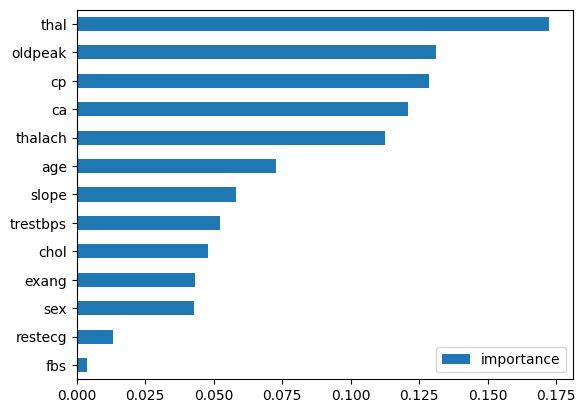

In [24]:
importances_df = pd.DataFrame(rf.feature_importances_, columns=['importance'], index=x.columns)
importances_df.sort_values(by='importance').plot(kind='barh')

<Axes: >

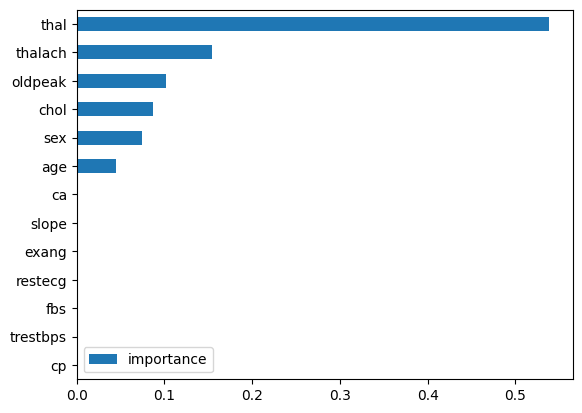

In [25]:
importances_df = pd.DataFrame(dt.feature_importances_, columns=['importance'], index=x.columns)
importances_df.sort_values(by='importance').plot(kind='barh')

<Axes: >

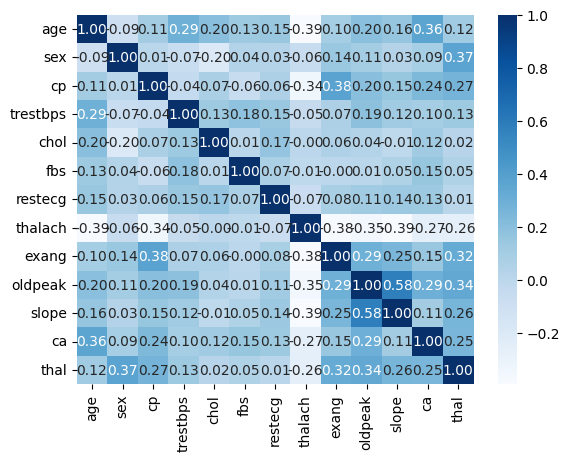

In [28]:
import seaborn as sns

sns.heatmap(x.corr(), fmt='.2f', cmap='Blues', annot=True)

In [34]:
score_data = pd.DataFrame()
for depth in range(1, 30):
    tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=depth, min_samples_leaf=7, min_samples_split=7)
    tree_clf.fit(x_train, y_train)
    train_score = tree_clf.score(x_train, y_train)
    test_score = tree_clf.score(x_test, y_test)
    temp_df = pd.DataFrame({'max_depth': [depth], 'train_score': [train_score], 'test_score': [test_score]})
    score_data = pd.concat([score_data, temp_df])

score_data.head(10)

,max_depth,train_score,test_score
0,1,0.779279,0.720000
0,2,0.797297,0.680000
0,3,0.860360,0.720000
0,4,0.860360,0.720000
0,5,0.873874,0.693333
0,6,0.873874,0.693333
0,7,0.873874,0.693333
0,8,0.873874,0.693333
0,9,0.873874,0.693333
0,10,0.873874,0.693333


<Axes: xlabel='max_depth'>

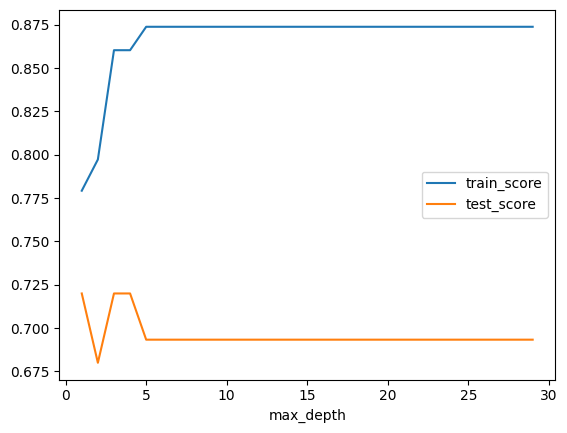

In [35]:
score_data.plot(x='max_depth')